In [ ]:
# Heart Disease dataset from kaggle.com
# Data description:
# Age: Patients Age in years (Numeric)
# Sex: Gender (Male : 1; Female : 0) (Nominal)
# cp: Type of chest pain experienced by patient. This term categorized into 4 category.
# 0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
# trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
# chol: Serum cholesterol in mg/dl (Numeric)
# fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
# restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
# 0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
# 0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
# thalach: Maximum heart rate achieved (Numeric)
# exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
# oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
# slope: ST segment measured in terms of slope during peak exercise
# 0: up sloping; 1: flat; 2: down sloping(Nominal)
# ca: The number of major vessels (0–3)(nominal)
# thal: A blood disorder called thalassemia
# 0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
# target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# For decision tree visualization
import graphviz 

In [4]:
data = pd.read_csv("Heart_disease_statlog.csv", index_col = 0)
#data = data.iloc[:-1]
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [5]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(max_depth=2) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.6481481481481481
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        33
           1       0.56      0.43      0.49        21

    accuracy                           0.65        54
   macro avg       0.62      0.61      0.61        54
weighted avg       0.64      0.65      0.64        54



In [8]:
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores.mean())

Cross-validation scores: 0.737037037037037


In [9]:
importance = clf.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {data.columns[i]}, Score: {j:.2f}')

Feature: sex, Score: 0.00
Feature: cp, Score: 0.62
Feature: trestbps, Score: 0.00
Feature: chol, Score: 0.00
Feature: fbs, Score: 0.00
Feature: restecg, Score: 0.00
Feature: thalach, Score: 0.00
Feature: exang, Score: 0.00
Feature: oldpeak, Score: 0.38
Feature: slope, Score: 0.00
Feature: ca, Score: 0.00
Feature: thal, Score: 0.00


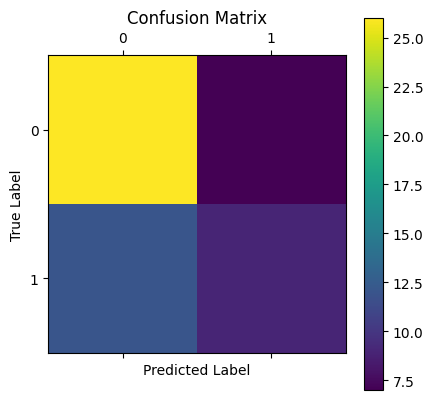

In [10]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()